In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rc('text',usetex=True)
plt.rc('font', size=52)
plt.rc('font', weight='bold')
plt.rc('font', family='serif')          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize

plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.rc('ytick', direction='in')
plt.rc('xtick', direction='in')
plt.rc('xtick.major',size=10)
plt.rc('ytick.major',size=10)
plt.rc('xtick.minor',size=5)
plt.rc('ytick.minor',size=5)
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'


In [3]:
def read_residuals(resfile):
    
    mjds = []; res = []; err = []
    
    openfile = open(resfile, 'r')
    
    for line in openfile.readlines():
        
        if line[0] is not '#':
            splitline = line.split()
            mjds.append(float(splitline[0]))
            res.append(float(splitline[1]))
            err.append(float(splitline[2])*1e-6)

    mjds = np.array(mjds)
    res = np.array(res)
    err = np.array(err)
    
    return mjds, res, err

In [4]:
mjds_WN, res_WN, err_WN = read_residuals('residuals_v1_W1R0D0.txt')
mjds_DM, res_DM, err_DM = read_residuals('residuals_v1_W1R0D1.txt')
mjds_RN, res_RN, err_RN = read_residuals('residuals_v2_W1R1D0.txt')
mjds_QP, res_QP, err_QP = read_residuals('residuals_postfit.txt')

In [5]:
z = np.polyfit(mjds_QP, res_QP, deg=2)
quad = np.poly1d(z)

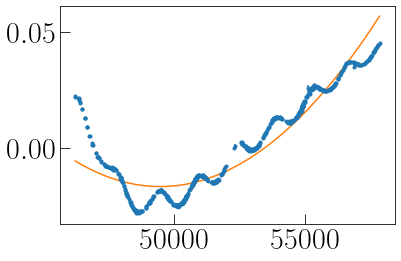

In [6]:
plt.figure()
plt.errorbar(mjds_QP, res_QP, err_QP, ls='', marker='.')
plt.plot(mjds_QP, quad(mjds_QP))
plt.show()

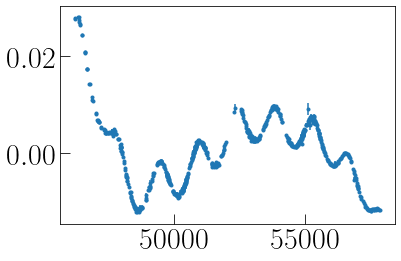

In [7]:
plt.figure()
plt.errorbar(mjds_QP, res_QP - quad(mjds_QP), err_QP, ls='', marker='.')
plt.show()

In [8]:
newres_QP = res_QP - quad(mjds_QP)

In [9]:
rescale = 2e3
random_res_QP = np.zeros_like(res_QP)
random_res_QP2 = np.zeros_like(res_QP)

for i, r in enumerate(res_QP):
    random_res_QP[i] = np.random.normal(r/rescale, 1e-6)
    random_res_QP2[i] = np.random.normal(r/rescale, 1e-6)    

In [10]:
random_newres_QP = np.zeros_like(res_QP)
random_newres_QP2 = np.zeros_like(res_QP)

for i, r in enumerate(newres_QP):
    random_newres_QP[i] = np.random.normal(r/rescale, 1e-6)
    random_newres_QP2[i] = np.random.normal(r/rescale, 1e-6)   

In [11]:
xticks = 46000+1000*np.arange(13)
xlabs = []
for i, xt in enumerate(xticks):
    
    if i%3==1:
        xlabs.append(str(xt))
    else:
        xlabs.append('')

xticks, xlabs

(array([46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000,
        55000, 56000, 57000, 58000]),
 ['', '47000', '', '', '50000', '', '', '53000', '', '', '56000', '', ''])

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


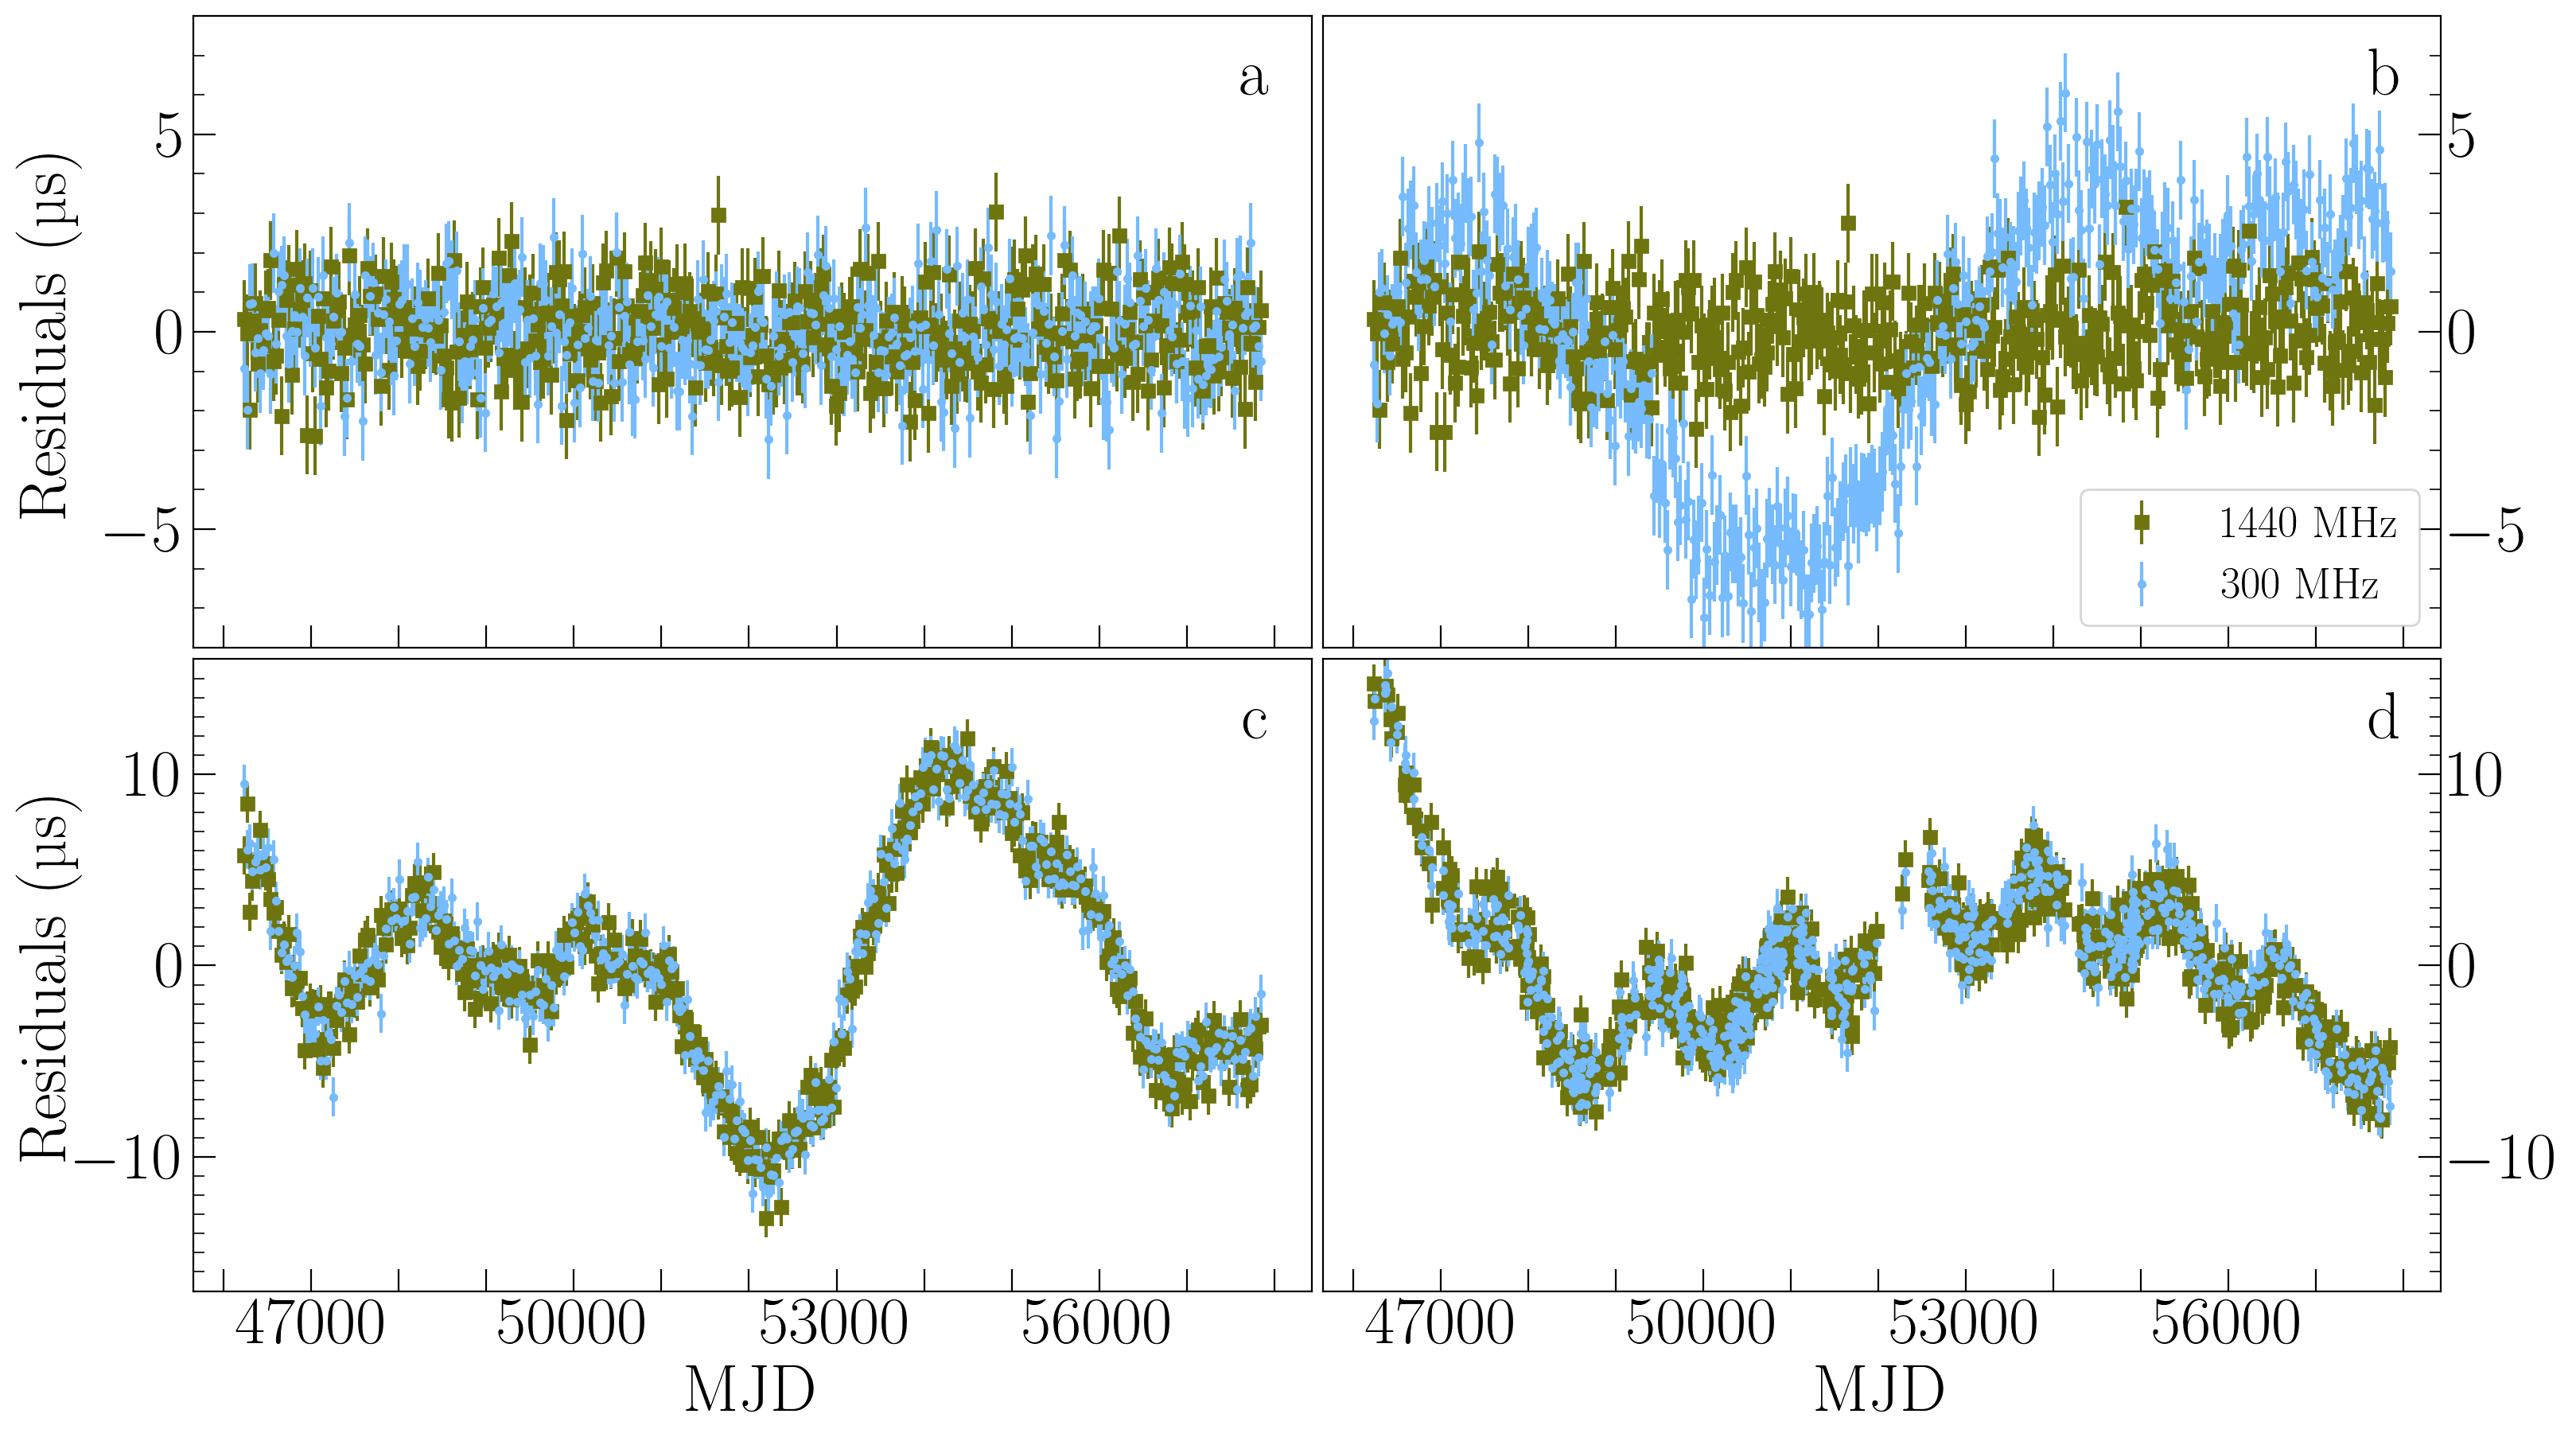

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(16,9), constrained_layout=True, sharex=True)

axs[0,0].errorbar(mjds_WN[::2], res_WN[::2]*1e6, err_WN[::2]*1e6, ls='', marker='s', c='xkcd:olive', label='1440 MHz')
axs[0,0].errorbar(mjds_WN[1::2], res_WN[1::2]*1e6, err_WN[1::2]*1e6, ls='', marker='.', c='xkcd:sky blue', label='300 MHz')


axs[0,1].errorbar(mjds_DM[::2], res_DM[::2]*1e6, err_DM[::2]*1e6, ls='', marker='s', \
                  c='xkcd:olive', label='1440 MHz')
axs[0,1].errorbar(mjds_DM[1::2], res_DM[1::2]*1e6, err_DM[1::2]*1e6, ls='', marker='.', \
                  c='xkcd:sky blue', label='300 MHz')
axs[0,1].legend(loc='lower right')


axs[1,0].errorbar(mjds_RN[::2], res_RN[::2]*1e6, err_RN[::2]*1e6, ls='', marker='s', c='xkcd:olive', label='1440 MHz')
axs[1,0].errorbar(mjds_RN[1::2], res_RN[1::2]*1e6, err_RN[1::2]*1e6, ls='', marker='.', c='xkcd:sky blue', label='300 MHz')


# axs[1,1].errorbar(mjds_QP, res_QP/rescale, err_QP/rescale, ls='', marker='.', c='xkcd:olive', label='1440 MHz')

axs[1,1].errorbar(mjds_QP, random_newres_QP*1e6, 1e-6*1e6, ls='', marker='s', c='xkcd:olive')
axs[1,1].errorbar(mjds_QP, random_newres_QP2*1e6, 1e-6*1e6, ls='', marker='.', c='xkcd:sky blue')

    
for ax in axs[0]:
    ax.set_ylim([-8, 8])
    
for ax in axs[1]:
    ax.set_ylim([-16, 16])

for ax in axs[:,1]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_yticklabels([], minor=True)
    ax.set_xticklabels([], minor=True)
    
for ax in axs[:,0]:
    ax.set_ylabel(r'Residuals (\si{\micro\second})')
    ax.yaxis.set_label_coords(-0.10, 0.5)

for ax in axs[1,:]:
    ax.set_xlabel(r'MJD')
    ax.set_yticks(np.arange(-17, 17, step=1), minor=True)

for ax in axs[0,:]:
    ax.set_yticks(np.arange(-8, 9, step=1), minor=True)
     
# axs[0,0].set_xlim([47000, 57000])

for ax, p in zip(axs.flat, ['a', 'b', 'c', 'd']):
    ax.set_xticks(xticks, labels=xlabs)
    ax.text(0.95, 0.9, p, horizontalalignment='center', verticalalignment='center', \
            transform=ax.transAxes, fontsize=30)
    
fig.tight_layout(pad=0.1)
fig.set_dpi(200) #500
fig.savefig('Fig_noises.pdf', bbox_inches='tight')
plt.show()
plt.close()